In [25]:
%matplotlib notebook

In [26]:
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import importlib
import os

In [28]:
df_results = pd.read_csv("df_results.csv",index_col=0)

In [29]:
df_results = df_results.replace(to_replace="False",value=np.nan)

In [30]:
df_results

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,H_abs_mag,G_slope,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,NaN,912,180,732,NaN,NaN,NaN,944,Hidalgo,NaN,...,0.102294,0.169405,0.195020,0.177596,0.174630,10.67,0.15,5.731378,0.660776,42.558495
0,NaN,250,91,159,NaN,NaN,NaN,NaN,2016 ND21,NaN,...,0.000000,0.156709,0.000000,0.145222,0.000000,12.30,0.15,8.474021,0.555689,21.826936
0,NaN,564,237,327,NaN,NaN,NaN,2060,Chiron,NaN,...,0.026777,0.082794,0.025250,0.085281,0.024563,5.83,0.15,13.704049,0.376917,6.927653
0,NaN,624,170,454,NaN,NaN,NaN,10199,Chariklo,NaN,...,0.100709,0.086245,0.094964,0.085669,0.099395,6.57,0.15,15.829840,0.167831,23.354025
0,NaN,273,69,204,NaN,NaN,NaN,37117,Narcissus,NaN,...,0.266525,0.062095,0.270622,0.045631,0.267550,13.29,0.15,6.873567,0.553777,13.806817
0,NaN,603,172,431,NaN,NaN,NaN,54598,Bienor,NaN,...,0.066928,0.261568,0.063814,0.049460,0.067061,7.54,0.15,16.478612,0.199701,20.745924
0,NaN,607,134,473,NaN,NaN,NaN,60558,Echeclus,NaN,...,0.219516,0.365529,0.250526,0.321628,0.211873,9.17,0.15,10.723046,0.457446,4.343387
0,NaN,127,69,58,NaN,NaN,NaN,347449,2012 TW236,NaN,...,0.270787,0.135437,0.318358,0.097894,0.371729,12.51,0.15,6.968091,0.568366,12.003213
0,NaN,395,110,285,NaN,NaN,NaN,349933,2009 YF7,NaN,...,0.069756,0.280943,0.070714,0.324901,0.074454,10.90,0.15,12.084282,0.461317,30.991334
0,NaN,456,127,329,NaN,NaN,NaN,459865,2013 XZ8,NaN,...,0.135102,0.027712,0.084700,0.015545,0.092603,9.65,0.15,13.378810,0.370562,22.536590


In [31]:
list(df_results)

['dateLastModified',
 'detection_count',
 'detection_count_c',
 'detection_count_o',
 'last_detection_mjd',
 'last_photometry_update_date_c',
 'last_photometry_update_date_o',
 'mpc_number',
 'name',
 'orbital_elements_id',
 'phase_angle_range_c',
 'phase_angle_range_o',
 'phase_curve_G12_2M10_c',
 'phase_curve_G12_2M10_o',
 'phase_curve_G12_P16_c',
 'phase_curve_G12_P16_o',
 'phase_curve_G12_err_2M10_c',
 'phase_curve_G12_err_2M10_o',
 'phase_curve_G12_err_P16_c',
 'phase_curve_G12_err_P16_o',
 'phase_curve_G1_3M10_c',
 'phase_curve_G1_3M10_o',
 'phase_curve_G1_err_3M10_c',
 'phase_curve_G1_err_3M10_o',
 'phase_curve_G2_3M10_c',
 'phase_curve_G2_3M10_o',
 'phase_curve_G2_err_3M10_c',
 'phase_curve_G2_err_3M10_o',
 'phase_curve_G_B89_c',
 'phase_curve_G_B89_o',
 'phase_curve_G_err_B89_c',
 'phase_curve_G_err_B89_o',
 'phase_curve_H_2M10_c',
 'phase_curve_H_2M10_o',
 'phase_curve_H_3M10_c',
 'phase_curve_H_3M10_o',
 'phase_curve_H_B89_c',
 'phase_curve_H_B89_o',
 'phase_curve_H_P16_c',


In [32]:
model = "B89" # B89, P16, 2M10, 3M10
filt = "o" # o, c

In [33]:
model_filt = "{}_{}".format(model,filt)

In [34]:
cols_keep1 = ["mpc_number","name","detection_count",
             "detection_count_{}".format(filt),"phase_angle_range_{}".format(filt),
            "N_apparitions","H_abs_mag","G_slope","a_semimajor_axis",
            "e_eccentricity","i_inclination_deg"]
cols_keep2 = [x for x in list(df_results) if x.endswith(model_filt)]
cols_keep = cols_keep1 + cols_keep2

In [35]:
cols_keep

['mpc_number',
 'name',
 'detection_count',
 'detection_count_o',
 'phase_angle_range_o',
 'N_apparitions',
 'H_abs_mag',
 'G_slope',
 'a_semimajor_axis',
 'e_eccentricity',
 'i_inclination_deg',
 'phase_curve_G_B89_o',
 'phase_curve_G_err_B89_o',
 'phase_curve_H_B89_o',
 'phase_curve_H_err_B89_o',
 'phase_curve_N_alpha_low_B89_o',
 'phase_curve_N_fit_B89_o',
 'phase_curve_N_iter_B89_o',
 'phase_curve_N_mag_err_B89_o',
 'phase_curve_N_nights_B89_o',
 'phase_curve_OC_mean_B89_o',
 'phase_curve_OC_range_B89_o',
 'phase_curve_OC_std_B89_o',
 'phase_curve_alpha_max_B89_o',
 'phase_curve_alpha_min_B89_o',
 'phase_curve_ier_B89_o',
 'phase_curve_nfev_B89_o',
 'phase_curve_N_cut_B89_o',
 'phase_curve_app_res_med_B89_o',
 'phase_curve_app_res_std_B89_o',
 'phase_curve_app_res_range_B89_o']

In [36]:
df=df_results[cols_keep]

In [37]:
df

,mpc_number,name,detection_count,detection_count_o,phase_angle_range_o,N_apparitions,H_abs_mag,G_slope,a_semimajor_axis,e_eccentricity,...,phase_curve_OC_range_B89_o,phase_curve_OC_std_B89_o,phase_curve_alpha_max_B89_o,phase_curve_alpha_min_B89_o,phase_curve_ier_B89_o,phase_curve_nfev_B89_o,phase_curve_N_cut_B89_o,phase_curve_app_res_med_B89_o,phase_curve_app_res_std_B89_o,phase_curve_app_res_range_B89_o
0,944,Hidalgo,912,732,29.4527,4,10.67,0.15,5.731378,0.660776,...,0.864268,0.153856,30.5823,1.1296,1,5,0,-0.045750,0.073748,0.195020
0,NaN,2016 ND21,250,159,12.9504,3,12.30,0.15,8.474021,0.555689,...,0.732699,0.149162,15.0720,2.1216,1,6,3,0.003626,0.000000,0.000000
0,2060,Chiron,564,327,2.8814,6,5.83,0.15,13.704049,0.376917,...,0.491530,0.100980,3.1055,0.2241,1,5,16,0.005605,0.010300,0.025250
0,10199,Chariklo,624,454,3.4237,6,6.57,0.15,15.829840,0.167831,...,0.486709,0.111925,3.5772,0.1535,1,4,73,0.028139,0.033806,0.094964
0,37117,Narcissus,273,204,16.7623,3,13.29,0.15,6.873567,0.553777,...,0.940227,0.166195,18.3289,1.5666,1,5,1,0.041335,0.118962,0.270622
0,54598,Bienor,603,431,2.7349,6,7.54,0.15,16.478612,0.199701,...,0.635218,0.147777,4.0452,1.3815,1,4,46,0.014356,0.023702,0.063814
0,60558,Echeclus,607,473,9.1698,6,9.17,0.15,10.723046,0.457446,...,0.675154,0.161615,9.5528,0.3830,1,4,147,0.071591,0.086408,0.250526
0,347449,2012 TW236,127,58,12.5237,2,12.51,0.15,6.968091,0.568366,...,1.064616,0.265196,14.4690,1.9453,1,4,5,-0.126562,0.159179,0.318358
0,349933,2009 YF7,395,285,6.9780,6,10.90,0.15,12.084282,0.461317,...,0.641769,0.145509,8.9607,1.9827,1,5,23,0.024614,0.025660,0.070714
0,459865,2013 XZ8,456,329,4.7577,4,9.65,0.15,13.378810,0.370562,...,0.597015,0.144210,6.9036,2.1459,1,4,26,0.004991,0.031642,0.084700


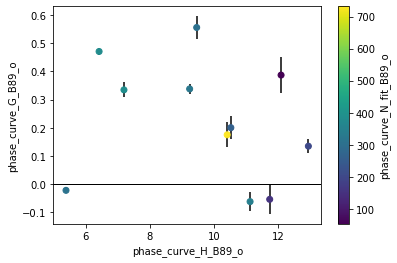

In [47]:
x_plot = "phase_curve_H_{}".format(model_filt)
y_plot = "phase_curve_G_{}".format(model_filt)
xerr = "phase_curve_H_err_{}".format(model_filt)
yerr = "phase_curve_G_err_{}".format(model_filt)
c_plot = "phase_curve_N_fit_{}".format(model_filt)

plt.errorbar(df[x_plot],df[y_plot],xerr=df[xerr],yerr=df[xerr],fmt="k.",zorder=0)
s1 = plt.scatter(df[x_plot],df[y_plot],c=df[c_plot])
cbar1 = plt.colorbar(s1)

plt.axhline(0,c="k",zorder=0,lw=1)

plt.xlabel(x_plot)
plt.ylabel(y_plot)
cbar1.set_label(c_plot)

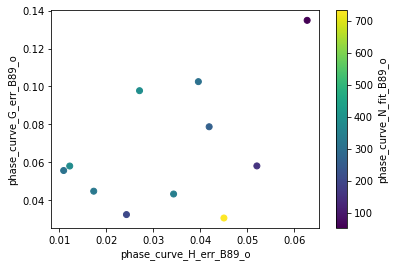

In [48]:
x_plot = "phase_curve_H_err_{}".format(model_filt)
y_plot = "phase_curve_G_err_{}".format(model_filt)
c_plot = "phase_curve_N_fit_{}".format(model_filt)

s1 = plt.scatter(df[x_plot],df[y_plot],c=df[c_plot])
cbar1 = plt.colorbar(s1)

plt.xlabel(x_plot)
plt.ylabel(y_plot)
cbar1.set_label(c_plot)

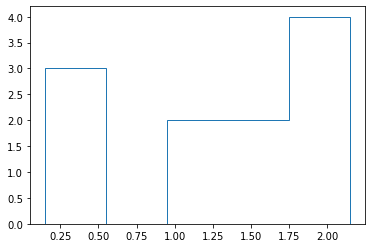

In [51]:
x=plt.hist(df["phase_curve_alpha_min_{}".format(model_filt)],bins="auto",histtype="step")